# **Project Name : Car Price Prediction**
### The objective of this project is to build a predictive model that estimates the price of a car given its relevant features. This model will help users, particularly buyers and sellers, in understanding the fair market value of a car and facilitate smoother transactions in online car marketplaces.

In [ ]:
# Importing the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car data.csv')

In [ ]:
# The first 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# The last 5 rows of the dataset
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# **Data Preprocessing**

In [ ]:
# Find shape of our dataset(Number of rows and number of columns)
print("Number of Rows", car_dataset.shape[0])
print("Number of Columns", car_dataset.shape[1])

Number of Rows 301
Number of Columns 9


In [ ]:
# Checking the number of missing values in each column
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

There is no null values in the customer churn dataset.

In [ ]:
# Getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Identifying duplicated values
car_dataset.duplicated().any()

True

In [ ]:
# Removing duplicated values
df = car_dataset.drop_duplicates()

In [ ]:
# After removing duplicated values checking the shape of the dataset
df.shape

(299, 9)

# **Feature Engineering**

**Exoploratoty Data Analysis (EDA)**

In [ ]:
# Statistical measures of the data
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Selling_type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [ ]:
# encoding "Seller_Type" Column
car_dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
# Converting rest of the categorical variables into dummy variables
car_dummies = pd.get_dummies(data = car_dataset, columns = ['Fuel_Type'])
car_dummies.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,0,0,0,0,0,1
1,sx4,2013,4.75,9.54,43000,0,0,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,0,1
4,swift,2014,4.60,6.87,42450,0,0,0,0,1,0


In [ ]:
X = car_dummies.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dummies['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Driven_kms  Selling_type  Transmission  Owner  \
0    2014           5.59       27000             0             0      0   
1    2013           9.54       43000             0             0      0   
2    2017           9.85        6900             0             0      0   
3    2011           4.15        5200             0             0      0   
4    2014           6.87       42450             0             0      0   
..    ...            ...         ...           ...           ...    ...   
296  2016          11.60       33988             0             0      0   
297  2015           5.90       60000             0             0      0   
298  2009          11.00       87934             0             0      0   
299  2017          12.50        9000             0             0      0   
300  2016           5.90        5464             0             0      0   

     Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0                0                 0      

In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

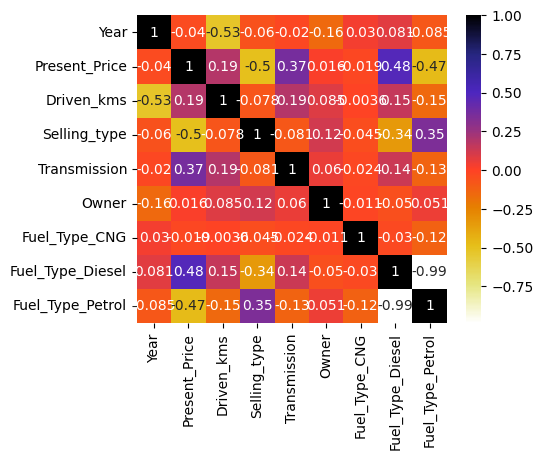

In [ ]:
# Using Pearson Correlation
plt.figure(figsize = (5,4))
cor = X_train.corr()
sns.heatmap(cor, annot = True,cmap = plt.cm.CMRmap_r)
plt.show()

# **Model Training**

In [ ]:
# List of models
models = {"Linear Regression" : LinearRegression(),
          "Decision Tree Regressor" : DecisionTreeRegressor(),
          "Random Forest Classifier" : RandomForestRegressor(),
          "XGBoost Regressor" : XGBRegressor(),
          "Gradient Bosst Regressor" : GradientBoostingRegressor()
}

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]

    # Training the model
    model.fit(X_train, y_train)

    # Evaluating the model on training data
    train_data_prediction = model.predict(X_train)

    # Evaluating the model on testing data
    test_data_prediction = model.predict(X_test)

    # Training set performance
    train_mae = mean_absolute_error(y_train, train_data_prediction)
    train_mse = mean_squared_error(y_train, train_data_prediction)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_data_prediction))
    train_r2_score = r2_score(y_train, train_data_prediction)

    # Testing set performance
    test_mae = mean_absolute_error(y_test, test_data_prediction)
    test_mse = mean_squared_error(y_test, test_data_prediction)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_data_prediction))
    test_r2_score = r2_score(y_test, test_data_prediction)


    print(list(models.keys())[i])

    print('Model Performance for Training Set')
    print("Mean Absolute Error : ", train_mae)
    print("Mean Squared Error : ", train_mse)
    print('Root Mean Squared Error :', train_rmse)
    print("R squared Error : ", train_r2_score)



    print('--------------------------------------------------------------')

    print('Model Performance for Training Set')
    print("Mean Absolute Error : ", test_mae)
    print("Mean Squared Error : ", test_mse)
    print('Root Mean Squared Error :', test_rmse)
    print("R squared Error : ", test_r2_score)



    print('='*80)
    print('\n')

Linear Regression
Model Performance for Training Set
Mean Absolute Error :  1.2131265629801964
Mean Squared Error :  3.192781249640869
Root Mean Squared Error : 1.786835540736995
R squared Error :  0.8823856405331203
--------------------------------------------------------------
Model Performance for Training Set
Mean Absolute Error :  1.072222825826077
Mean Squared Error :  1.717533347106281
Root Mean Squared Error : 1.3105469648609624
R squared Error :  0.8694567179820052


Decision Tree Regressor
Model Performance for Training Set
Mean Absolute Error :  6.167905692361981e-19
Mean Squared Error :  3.4238754566884194e-35
Root Mean Squared Error : 5.8513891142945016e-18
R squared Error :  1.0
--------------------------------------------------------------
Model Performance for Training Set
Mean Absolute Error :  0.4729032258064516
Mean Squared Error :  0.7272451612903229
Root Mean Squared Error : 0.8527867032795029
R squared Error :  0.9447248169320872


Random Forest Classifier
Model P